In [319]:
import pandas as pd
import numpy as np
# Libraries to help with data visualization
import matplotlib.pyplot as plt

import seaborn as  sns

#  Preprossesing

In [320]:
customer_read = pd.read_csv('customer_analysis.csv', sep = ";")
customer_data = pd.DataFrame(customer_read)

In [321]:
customer_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,WinesProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2019-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2021-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2020-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2021-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2021-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


#### explain columns

ID : Unique ID of each customer
Year_Birth : Age of the customer
Education : Customer's level of education
Marital_Status : Customer's marital status
Kidhome : Number of small children in customer's household
Teenhome : Number of teenagers in customer's household
Income : Customer's yearly household income
Recency : Number of days since the last purchase
MntFishProducts : The amount spent on fish products in the last 2 years
MntMeatProducts : The amount spent on meat products in the last 2 years
MntFruits : The amount spent on fruits products in the last 2 years
MntSweetProducts : Amount spent on sweet products in the last 2 years
MntWines : The amount spent on wine products in the last 2 years
MntGoldProds : The amount spent on gold products in the last 2 years
NumDealsPurchases : Number of purchases made with discount
NumCatalogPurchases : Number of purchases made using catalog (buying goods to be shipped through the mail)
NumStorePurchases : Number of purchases made directly in stores
NumWebPurchases : Number of purchases made through the company's website
NumWebVisitsMonth : Number of visits to company's website in the last month
AcceptedCmp1 : 1 if customer accepted the offer in the first campaign, 0 otherwise
AcceptedCmp2 : 1 if customer accepted the offer in the second campaign, 0 otherwise
AcceptedCmp3 : 1 if customer accepted the offer in the third campaign, 0 otherwise
AcceptedCmp4 : 1 if customer accepted the offer in the fourth campaign, 0 otherwise
AcceptedCmp5 : 1 if customer accepted the offer in the fifth campaign, 0 otherwise
AcceptedCmp6 : 1 if customer accepted the offer in the last campaign, 0 otherwise
Complain : 1 If the customer complained in the last 2 years, 0 otherwise

In [322]:
customer_data.shape

(2244, 29)

In [323]:
customer_data.info()
# DT_CUSTOMER is object should be datatime


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2244 entries, 0 to 2243
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2244 non-null   int64  
 1   Year_Birth           2244 non-null   int64  
 2   Education            2244 non-null   object 
 3   Marital_Status       2244 non-null   object 
 4   Income               2220 non-null   float64
 5   Kidhome              2244 non-null   int64  
 6   Teenhome             2244 non-null   int64  
 7   Dt_Customer          2244 non-null   object 
 8   Recency              2244 non-null   int64  
 9   WinesProducts        2244 non-null   int64  
 10  FruitsProducts       2244 non-null   int64  
 11  MeatProducts         2244 non-null   int64  
 12  FishProducts         2244 non-null   int64  
 13  SweetProducts        2244 non-null   int64  
 14  GoldProducts         2244 non-null   int64  
 15  NumDealsPurchases    2244 non-null   i

In [324]:
# change Dt_customer to datatime
customer_data['Dt_Customer'] = pd.to_datetime(customer_data['Dt_Customer'],
                                            dayfirst=True, format='%Y-%m-%d')

In [325]:
customer_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2244.0,5599.004456,3247.809241,0.0,2830.5,5482.5,8439.75,11191.0
Year_Birth,2244.0,1968.820410,11.978369,1893.0,1959.0,1970.0,1977.00,1996.0
Income,2220.0,53327.439640,35769.863967,1730.0,35335.5,51411.5,68655.50,667456.0
Kidhome,2244.0,0.445187,0.538429,0.0,0.0,0.0,1.00,2.0
Teenhome,2244.0,0.505348,0.544472,0.0,0.0,0.0,1.00,2.0
Recency,2244.0,49.062834,28.957578,0.0,24.0,49.0,74.00,99.0
WinesProducts,2244.0,303.409982,336.527276,0.0,23.0,173.0,504.00,1493.0
FruitsProducts,2244.0,26.280303,39.741343,0.0,1.0,8.0,33.00,199.0
MeatProducts,2244.0,166.684492,225.601569,0.0,16.0,67.0,231.25,1725.0
FishProducts,2244.0,37.472816,54.594461,0.0,3.0,12.0,50.00,259.0


In [326]:
# delete columns that we do not need them
customer_data = customer_data.drop(columns=['ID', 'Year_Birth'])

In [327]:
# Printing the count of each unique value in each column
for column in customer_data.columns:
    print(column)
    print(customer_data[column].value_counts())
    print("-" * 40)

Education
Graduation    1131
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
----------------------------------------
Marital_Status
Married     864
Together    584
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
----------------------------------------
Income
7500.0     12
35860.0     4
80134.0     3
39922.0     3
47025.0     3
           ..
74250.0     1
40760.0     1
41452.0     1
6835.0      1
52869.0     1
Name: Income, Length: 1978, dtype: int64
----------------------------------------
Kidhome
0    1293
1     903
2      48
Name: Kidhome, dtype: int64
----------------------------------------
Teenhome
0    1162
1    1030
2      52
Name: Teenhome, dtype: int64
----------------------------------------
Dt_Customer
2019-08-31    12
2021-05-12    11
2020-02-14    11
2019-09-12    11
2021-05-22    10
              ..
2019-08-05     1
2019-11-18     

##### education: 2n cycle and Master means the same thing. We can combine these two categories. and change the value to garduation and undergraduation and post graduation
##### Marital_status: We can combine the category 'Together  with 'married' and single and alone and widow and divorced with single. and absurd and yolo single
##### There are only 21 customers who complained in the last two years.
##### teen home and kid home : can combine and their value by has child(1) or not(0)
##### and delete z_revenue and z_costcontact becuase of they just have one value

In [328]:
# Education
customer_data['Education'] = customer_data['Education'].replace(
    {'Basic': 'Undergraduate',
     'Master': 'Postgraduate',
     '2n Cycle': 'Postgraduate',
     'PhD': 'Postgraduate'})

In [329]:
# Marital_Status
customer_data['Marital_Status'] = customer_data['Marital_Status'].replace(
    {'Divorced': 'Single', 'Together': 'Married',
     'Widow': 'Single', 'Alone': 'Single', 'YOLO': 'Single', 'Absurd': 'Single'})


In [330]:
# Teen and kid home
customer_data['Children'] = customer_data['Kidhome'] + customer_data['Teenhome']
customer_data['Children'] = np.where(customer_data.Children> 0 , 1, 0)
# delete kidhome and teenhome
customer_data = customer_data.drop(columns=['Kidhome', 'Teenhome'])

In [331]:
# drop z_revenue and z_costcontact
customer_data = customer_data.drop(columns=['Z_Revenue', 'Z_CostContact'])

In [332]:
customer_data.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,WinesProducts,FruitsProducts,MeatProducts,FishProducts,SweetProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Children
0,Graduation,Single,58138.0,2019-09-04,58,635,88,546,172,88,...,4,7,0,0,0,0,0,0,1,0
1,Graduation,Single,46344.0,2021-03-08,38,11,1,6,2,1,...,2,5,0,0,0,0,0,0,0,1
2,Graduation,Married,71613.0,2020-08-21,26,426,49,127,111,21,...,10,4,0,0,0,0,0,0,0,0
3,Graduation,Married,26646.0,2021-02-10,26,11,4,20,10,3,...,4,6,0,0,0,0,0,0,0,1
4,Postgraduate,Married,58293.0,2021-01-19,94,173,43,118,46,27,...,6,5,0,0,0,0,0,0,0,1


In [333]:
#null values
customer_data.isnull().sum()
# income column has null value

Education               0
Marital_Status          0
Income                 24
Dt_Customer             0
Recency                 0
WinesProducts           0
FruitsProducts          0
MeatProducts            0
FishProducts            0
SweetProducts           0
GoldProducts            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
Children                0
dtype: int64

In [334]:
customer_data.isna().sum()

Education               0
Marital_Status          0
Income                 24
Dt_Customer             0
Recency                 0
WinesProducts           0
FruitsProducts          0
MeatProducts            0
FishProducts            0
SweetProducts           0
GoldProducts            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
Children                0
dtype: int64

In [335]:
# delete null values
customer_data.dropna(axis = 0, inplace = True)
# beacuase is just 24 and it does not matter

In [336]:
customer_data.isnull().sum()

Education              0
Marital_Status         0
Income                 0
Dt_Customer            0
Recency                0
WinesProducts          0
FruitsProducts         0
MeatProducts           0
FishProducts           0
SweetProducts          0
GoldProducts           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Children               0
dtype: int64

In [337]:
# حذف داده های تکراری
customer_data.drop_duplicates(inplace=True)
customer_data.reset_index(drop=True, inplace=True)
customer_data.shape

(2035, 24)

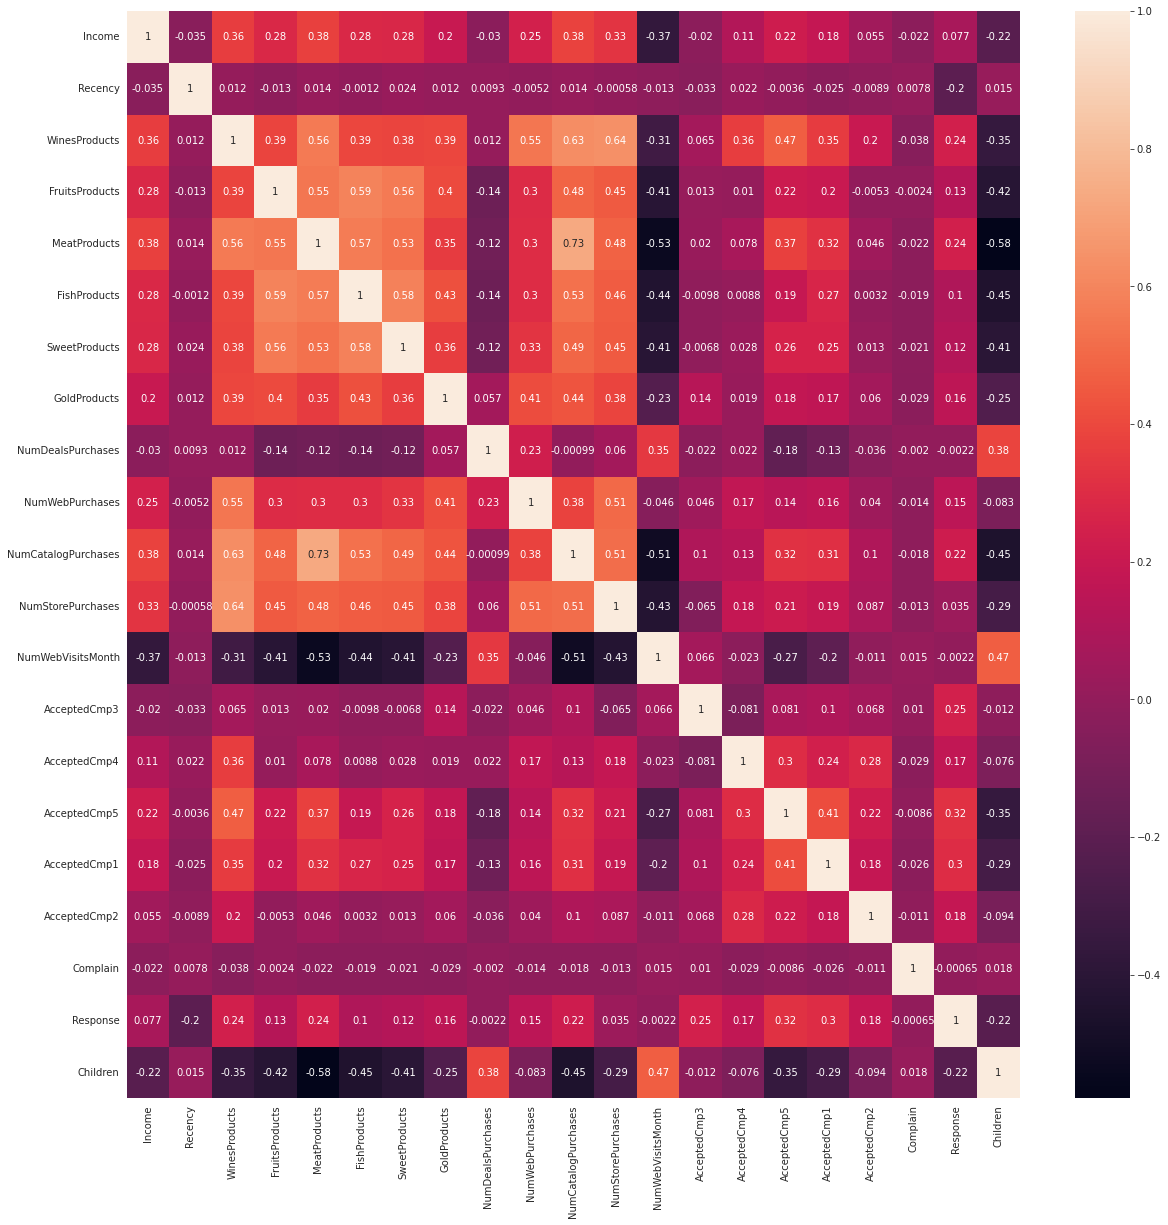

In [338]:
plt.figure(figsize=(20,20))
sns.heatmap(customer_data.corr(), annot=True)
plt.show()

### according to heatmap there is strong relationship with meatproduct and numcatalogepurches

In [339]:
customer_data.head(30)

,Education,Marital_Status,Income,Dt_Customer,Recency,WinesProducts,FruitsProducts,MeatProducts,FishProducts,SweetProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Children
0,Graduation,Single,58138.0,2019-09-04,58,635,88,546,172,88,...,4,7,0,0,0,0,0,0,1,0
1,Graduation,Single,46344.0,2021-03-08,38,11,1,6,2,1,...,2,5,0,0,0,0,0,0,0,1
2,Graduation,Married,71613.0,2020-08-21,26,426,49,127,111,21,...,10,4,0,0,0,0,0,0,0,0
3,Graduation,Married,26646.0,2021-02-10,26,11,4,20,10,3,...,4,6,0,0,0,0,0,0,0,1
4,Postgraduate,Married,58293.0,2021-01-19,94,173,43,118,46,27,...,6,5,0,0,0,0,0,0,0,1
5,Postgraduate,Married,62513.0,2020-09-09,16,520,42,98,0,42,...,10,6,0,0,0,0,0,0,0,1
6,Graduation,Single,55635.0,2019-11-13,34,235,65,164,50,49,...,7,6,0,0,0,0,0,0,0,1
7,Postgraduate,Married,33454.0,2020-05-08,32,76,10,56,3,1,...,4,8,0,0,0,0,0,0,0,1
8,Postgraduate,Married,30351.0,2020-06-06,19,14,0,24,3,3,...,2,9,0,0,0,0,0,0,1,1
9,Postgraduate,Married,5648.0,2021-03-13,68,28,0,6,1,1,...,0,20,1,0,0,0,0,0,0,1


In [340]:
customer_data = pd.get_dummies(customer_data)
customer_data.head()

,Income,Dt_Customer,Recency,WinesProducts,FruitsProducts,MeatProducts,FishProducts,SweetProducts,GoldProducts,NumDealsPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Children,Education_Graduation,Education_Postgraduate,Education_Undergraduate,Marital_Status_Married,Marital_Status_Single
0,58138.0,2019-09-04,58,635,88,546,172,88,88,3,...,0,0,0,1,0,1,0,0,0,1
1,46344.0,2021-03-08,38,11,1,6,2,1,6,2,...,0,0,0,0,1,1,0,0,0,1
2,71613.0,2020-08-21,26,426,49,127,111,21,42,1,...,0,0,0,0,0,1,0,0,1,0
3,26646.0,2021-02-10,26,11,4,20,10,3,5,2,...,0,0,0,0,1,1,0,0,1,0
4,58293.0,2021-01-19,94,173,43,118,46,27,15,5,...,0,0,0,0,1,0,1,0,1,0


In [341]:
# columns DT_Customer because is time
from datetime import date

# محاسبه تعداد ماه ورود
last_date = date(2021, 10, 4)
customer_data['Dt_Customer'] = pd.to_numeric(
    customer_data['Dt_Customer'].dt.date.apply(lambda x: (last_date - x)).dt.days,
    downcast='integer') // 30
customer_data.head()


,Income,Dt_Customer,Recency,WinesProducts,FruitsProducts,MeatProducts,FishProducts,SweetProducts,GoldProducts,NumDealsPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Children,Education_Graduation,Education_Postgraduate,Education_Undergraduate,Marital_Status_Married,Marital_Status_Single
0,58138.0,25,58,635,88,546,172,88,88,3,...,0,0,0,1,0,1,0,0,0,1
1,46344.0,7,38,11,1,6,2,1,6,2,...,0,0,0,0,1,1,0,0,0,1
2,71613.0,13,26,426,49,127,111,21,42,1,...,0,0,0,0,0,1,0,0,1,0
3,26646.0,7,26,11,4,20,10,3,5,2,...,0,0,0,0,1,1,0,0,1,0
4,58293.0,8,94,173,43,118,46,27,15,5,...,0,0,0,0,1,0,1,0,1,0


In [342]:
# normalize  our data
from sklearn.preprocessing import normalize

customer_data_scale = normalize(customer_data, norm='l2')
customer_data_scale = pd.DataFrame(customer_data_scale, index=customer_data.index, columns=customer_data.columns)
customer_data_scale.head()

,Income,Dt_Customer,Recency,WinesProducts,FruitsProducts,MeatProducts,FishProducts,SweetProducts,GoldProducts,NumDealsPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Children,Education_Graduation,Education_Postgraduate,Education_Undergraduate,Marital_Status_Married,Marital_Status_Single
0,0.999888,0.000430,0.000998,0.010921,0.001513,0.009390,0.002958,0.001513,0.001513,0.000052,...,0.0,0.0,0.0,0.000017,0.000000,0.000017,0.000000,0.0,0.000000,0.000017
1,1.000000,0.000151,0.000820,0.000237,0.000022,0.000129,0.000043,0.000022,0.000129,0.000043,...,0.0,0.0,0.0,0.000000,0.000022,0.000022,0.000000,0.0,0.000000,0.000022
2,0.999979,0.000182,0.000363,0.005949,0.000684,0.001773,0.001550,0.000293,0.000586,0.000014,...,0.0,0.0,0.0,0.000000,0.000000,0.000014,0.000000,0.0,0.000014,0.000000
3,0.999999,0.000263,0.000976,0.000413,0.000150,0.000751,0.000375,0.000113,0.000188,0.000075,...,0.0,0.0,0.0,0.000000,0.000038,0.000038,0.000000,0.0,0.000038,0.000000
4,0.999991,0.000137,0.001613,0.002968,0.000738,0.002024,0.000789,0.000463,0.000257,0.000086,...,0.0,0.0,0.0,0.000000,0.000017,0.000000,0.000017,0.0,0.000017,0.000000


In [344]:
data = customer_data.to_csv()
with open('1.csv', 'w') as f:
    f.write(data)